In [1]:

dir_path = ''
import pandas as pd

pd.set_option('display.width', 1000)
pd.set_option('display.max_columns', 10)

print(dir_path)

def csv_import(name, delimiter="|"):
    x = pd.read_csv(name, encoding='utf8', low_memory=False, delimiter=delimiter,
                    dtype={'text': str,
                           "USD_Disbursement": float
                           }
                    )
    return x

C:/Users/malte/Documents/GitHub/Climate_Finance_Bert/


In [2]:
df = csv_import(dir_path+'Data/climate_finance_total.csv')

In [3]:
print(df.shape)
print(df.meta_category)
df['ClimateAll']=0
df['ClimateAll'][(df.ClimateAdaptation==1)|(df.ClimateMitigation==1)]=1
df['ClimateAll'][(df.ClimateAdaptation==2)|(df.ClimateMitigation==2)]=2

print(df.columns)

(2737303, 104)
0          None
1          None
2          None
3          None
4          None
           ... 
2737298    None
2737299    None
2737300    None
2737301    None
2737302    None
Name: meta_category, Length: 2737303, dtype: object
Index(['Year', 'DonorCode', 'DonorName', 'AgencyCode', 'AgencyName', 'CrsID', 'ProjectNumber', 'InitialReport', 'RecipientCode', 'RecipientName',
       ...
       'GrantElement', 'USD_Future_DS_Principal', 'USD_Future_DS_Interest', 'DonorType', 'prediction_criterium', 'climate_relevance', 'climate_class_number', 'climate_class', 'meta_category', 'ClimateAll'], dtype='object', length=105)


C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\malte\Documents\GitHub\Climate_Finance_Bert\virtualenv\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [4]:
df.ClimateAdaptation=df.ClimateAdaptation.fillna(4)
df.ClimateMitigation=df.ClimateMitigation.fillna(4)
df.ClimateAdaptation=df.ClimateAdaptation.astype(int)
df.ClimateMitigation=df.ClimateMitigation.astype(int)


In [5]:
df = df[df.Year>2015]

In [6]:
import numpy as np
def get_matrix_frame_recall(df,metric='precision'):

    donors = df.DonorName.drop_duplicates().to_list()

    donors.sort()
    print(len(donors))
    conditions_bert = [['Mitigation'],['Mitigation'],['Adaptation'],['Adaptation'],
                       ['Mitigation','Adaptation'],['Mitigation','Adaptation'],
                       ['Mitigation','Adaptation','Environment'],['Mitigation','Adaptation','Environment']]
    columns_rio = ['ClimateMitigation','ClimateMitigation','ClimateAdaptation','ClimateAdaptation',
                   'ClimateAll','ClimateAll','ClimateAll','ClimateAll']
    conditions_rio = [[2],[1,2],[2],[1,2],[2],[1,2],[2],[1,2]]
    list_data_entries = [[],[],[],[],[],[],[],[]]

    for donor in donors:
        df_donor = df[df.DonorName==donor]
        for i,column in enumerate(list_data_entries):
                try:
                    column.append(
                    df_donor[(df_donor[columns_rio[i]].isin(conditions_rio[i]))&(df_donor.meta_category.isin(conditions_bert[i]))].shape[0]/
                     df_donor[df_donor.meta_category.isin(conditions_bert[i])].shape[0]
                )
                except:
                    column.append(np.nan)

        del df_donor

    df_matrix = pd.DataFrame(data={
        'Donor':donors,
        'Mitigation':list_data_entries[1],
        #'mitigation_S':list_data_entries[1],
        'Adaptation':list_data_entries[3],
       # 'adaptation_S':list_data_entries[3],
        'Climate finance':list_data_entries[5],
        #'climate_SP':list_data_entries[5],
        'Climate finance \n (incl. environment)*':list_data_entries[7],
        #'climate_SS':list_data_entries[7],
    })
    return df_matrix,donors, [list_data_entries[1],list_data_entries[3],list_data_entries[5],list_data_entries[7]]



In [7]:
df_matrix,donors, values = get_matrix_frame_recall(df,metric='precision')
df_matrix = df_matrix.set_index('Donor')
print(df_matrix)


49
                      Mitigation  Adaptation  Climate finance  Climate finance \n (incl. environment)*
Donor                                                                                                 
Australia               0.411765    0.655462         0.591331                                 0.565591
Austria                 0.858824    0.744361         0.836469                                 0.678663
Azerbaijan                   NaN         NaN              NaN                                 0.000000
Belgium                 0.712121    0.838028         0.831731                                 0.649371
Bulgaria                     NaN         NaN              NaN                                      NaN
Canada                  0.737569    0.830762         0.826189                                 0.693527
Chinese Taipei               NaN         NaN              NaN                                      NaN
Croatia                 0.000000    0.000000         0.000000         

0
1
2
3


<Figure size 432x288 with 0 Axes>

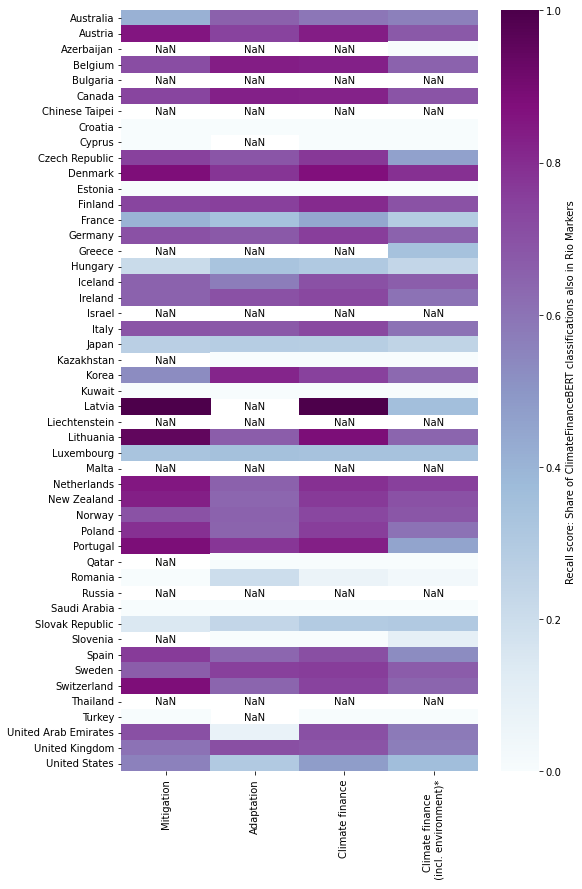

In [16]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns
import matplotlib as mpl
font = {'size'   : 8}

import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,14))

ax = sns.heatmap(df_matrix, cmap='BuPu',cbar_kws={'label': 'Recall score: Share of ClimateFinanceBERT classifications also in Rio Markers'}
                 )
# Loop over data dimensions and create text annotations.

for i,value in enumerate(values):
    print(i)

    for j in range(len(donors)):
        if pd.isna(value[j]):

            text = ax.text(i+0.5, j+0.5, "NaN",
                       ha="center", va="center",
                            color="black")


ax.set_xticklabels(['Mitigation','Adaptation','Climate finance','Climate finance \n (incl. environment)*'])
plt.xticks(rotation=90)
ax.set_ylabel("")
plt.savefig(dir_path+'Figures/recall_rio_significant_&_principal.png', dpi=1200, bbox_inches = "tight")

In [10]:
print(df_matrix[df_matrix.index =="France"])
print(df_matrix[df_matrix.index =="United States"])

        Mitigation  Adaptation  Climate finance  Climate finance \n (incl. environment)*
Donor                                                                                   
France    0.367308    0.343972         0.409228                                 0.341212
               Mitigation  Adaptation  Climate finance  Climate finance \n (incl. environment)*
Donor                                                                                          
United States     0.56805    0.386569         0.531772                                 0.396097


In [18]:
import numpy as np
def get_matrix_frame_precision(df,metric='precision'):

    donors = df.DonorName.drop_duplicates().to_list()

    donors.sort()
    print(len(donors))
    conditions_bert = [['Mitigation'],['Mitigation'],['Adaptation'],['Adaptation'],
                       ['Mitigation','Adaptation'],['Mitigation','Adaptation'],
                       ['Mitigation','Adaptation','Environment'],['Mitigation','Adaptation','Environment']]
    columns_rio = ['ClimateMitigation','ClimateMitigation','ClimateAdaptation','ClimateAdaptation',
                   'ClimateAll','Climate_All','ClimateAll','Climate_All','ClimateAll','Climate_All']
    conditions_rio = [[2],[1,2],[2],[1,2],[2],[1,2],[2],[1,2]]
    list_data_entries = [[],[],[],[],[],[],[],[]]
    list_mitigation_P = []
    list_mitigation_S = []
    list_adaptation_P = []
    list_adaptation_S= []
    list_climate_PP = []
    list_climate_SP =[]
    list_climate_PS =[]
    list_climate_SS = []

    for donor in donors:
        df_donor = df[df.DonorName==donor]
        for i,column in enumerate(list_data_entries):
                try:
                    column.append(
                    df_donor[(df_donor[columns_rio[i]].isin(conditions_rio[i]))&(df_donor.meta_category.isin(conditions_bert[i]))].shape[0]/
                     df_donor[df_donor[columns_rio[i]].isin(conditions_rio[i])].shape[0]
                )
                except:
                    column.append(np.nan)

        del df_donor

    df_matrix = pd.DataFrame(data={
        'Donor':donors,
        'Mitigation':list_data_entries[0],
        #'mitigation_S':list_data_entries[1],
        'Adaptation':list_data_entries[2],
        #'adaptation_S':list_data_entries[3],
        'Climate finance':list_data_entries[4],
       # 'climate_SP':list_data_entries[5],
        'Climate finance (incl. environment*)':list_data_entries[6],
       # 'climate_SS':list_data_entries[7],
    })
    return df_matrix, donors, [list_data_entries[0],list_data_entries[2],list_data_entries[4],list_data_entries[6]]




In [19]:
df_matrix, donors, values = get_matrix_frame_precision(df,metric='precision')
df_matrix = df_matrix.set_index('Donor')
print(df_matrix)


49
                      Mitigation  Adaptation  Climate finance  Climate finance (incl. environment*)
Donor                                                                                              
Australia               0.122449    0.528846         0.521368                              0.521368
Austria                 0.625000    0.569231         0.735075                              0.856343
Azerbaijan                   NaN         NaN              NaN                                   NaN
Belgium                 0.230769    0.473333         0.560000                              0.645714
Bulgaria                     NaN         NaN              NaN                                   NaN
Canada                  0.421659    0.832099         0.876266                              0.891462
Chinese Taipei               NaN         NaN              NaN                                   NaN
Croatia                      NaN         NaN              NaN                                   N

0
1
2
3


<Figure size 432x288 with 0 Axes>

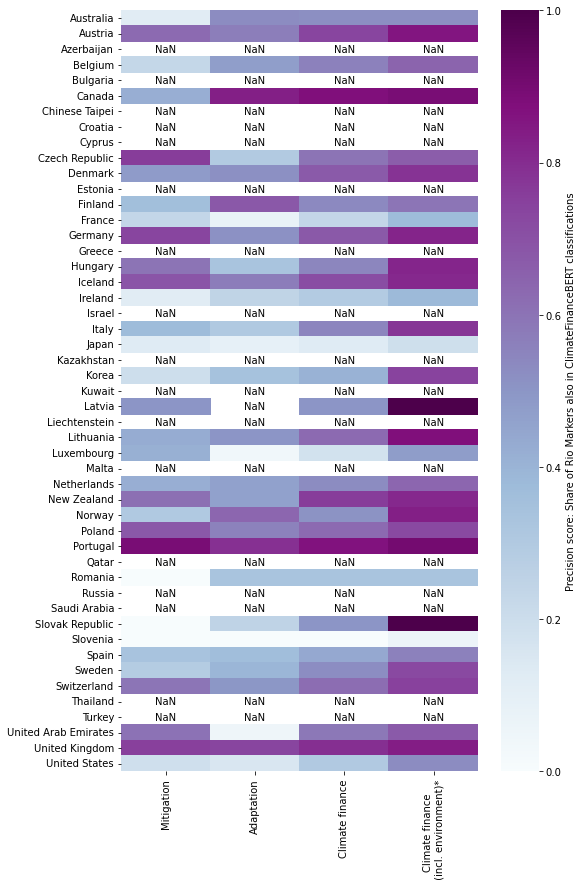

In [20]:
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import seaborn as sns
import matplotlib as mpl
font = {'size'   : 8}

import matplotlib.pyplot as plt
%matplotlib inline


fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(8,14))

ax = sns.heatmap(df_matrix, cmap='BuPu',cbar_kws={'label': 'Precision score: Share of Rio Markers also in ClimateFinanceBERT classifications'}
                 )
# Loop over data dimensions and create text annotations.

for i,value in enumerate(values):
    print(i)

    for j in range(len(donors)):
        if pd.isna(value[j]):
             text = ax.text(i+0.5, j+0.5, "NaN",
                       ha="center", va="center",
                            color="black")

ax.set_xticklabels(['Mitigation','Adaptation','Climate finance','Climate finance \n (incl. environment)*'])
plt.xticks(rotation=90)
ax.set_ylabel("")
plt.savefig(dir_path+'Figures/precision_rio.png', dpi=1200, bbox_inches = "tight")

